# Credit Cards Clustering

## Dataset Characteristics and Attributes
<p>
Dataset contains data about 8950 credit cards users and their financial behaviour in six-month period. Each entry contains summary of information about a single user. Dataset has 17 following parameters:<br>
CUSTID : Identification of Credit Card holder (Categorical) <br>
BALANCE : Balance amount left in their account to make purchases <br>
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) <br>
PURCHASES : Total sum of spent money from account. Amount of purchases made from account <br>
ONEOFFPURCHASES : Maximum purchase amount done in one-go <br>
INSTALLMENTSPURCHASES : Amount of purchase done in installment <br>
CASHADVANCE : Cash in advance given by the user <br>
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) <br>
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) <br>
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) <br>
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid <br>
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" <br>
PURCHASESTRX : Numbe of purchase transactions made <br>
CREDITLIMIT : Limit of Credit Card for user <br>
PAYMENTS : Amount of Payment done by user <br>
MINIMUM_PAYMENTS : Minimum amount of payments made by user <br>
PRCFULLPAYMENT : Percent of full payment paid by user <br>
TENURE : Tenure of credit card service for user <br>
</p>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score

sns.set() # make plots nice

credit_cards = pd.read_csv('CC GENERAL.csv')
credit_cards = credit_cards.drop(columns=['CUST_ID'])

## Exploration Analysis

In [ ]:
credit_cards.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


There are 313 null values in **MINIMUM_PAYMENTS** and one null value in **CREDIT_LIMIT**. Since it is not a large number, we will delete these values before clustering.

In [ ]:
credit_cards.info()
credit_cards.shape
credit_cards.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


<h3> Graphs </h3>
Here are histograms of features from our dataset.

BALANCE


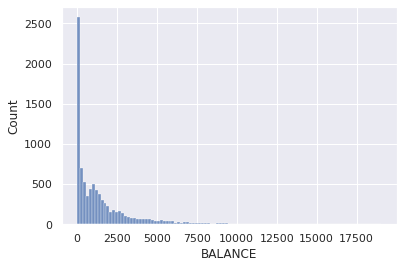

BALANCE_FREQUENCY


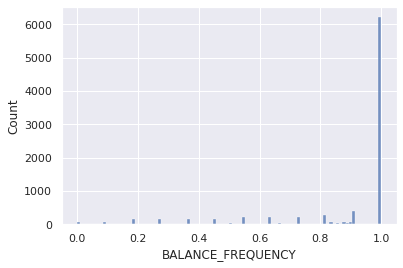

PURCHASES


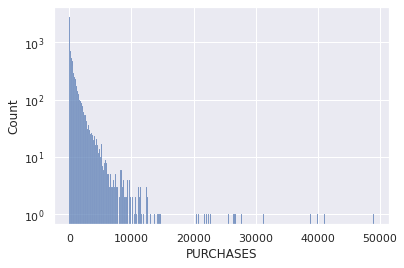

ONEOFF_PURCHASES


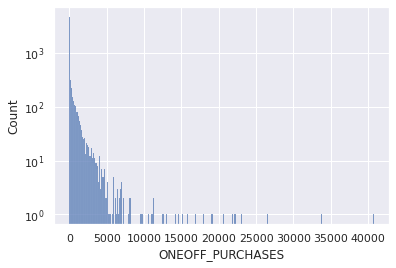

INSTALLMENTS_PURCHASES


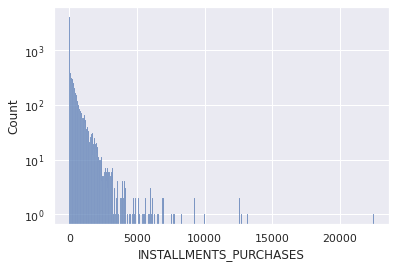

CASH_ADVANCE


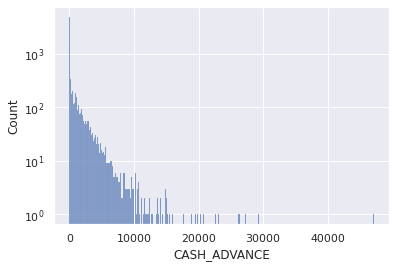

PURCHASES_FREQUENCY


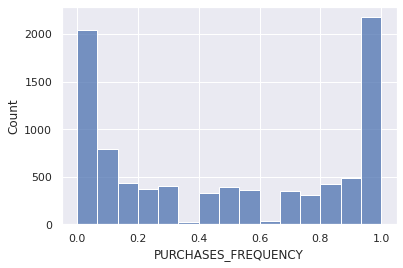

ONEOFF_PURCHASES_FREQUENCY


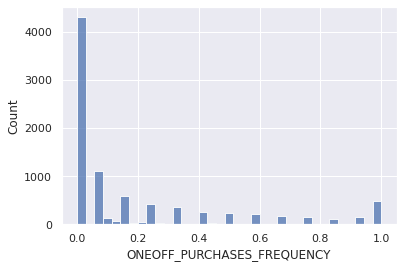

PURCHASES_INSTALLMENTS_FREQUENCY


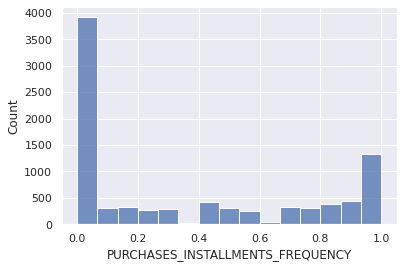

CASH_ADVANCE_FREQUENCY


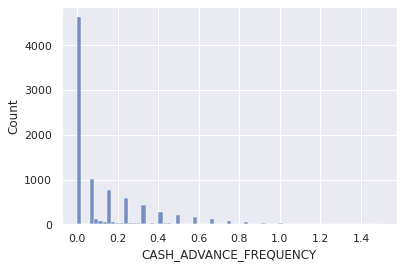

CASH_ADVANCE_TRX


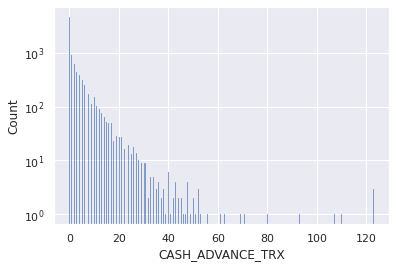

PURCHASES_TRX


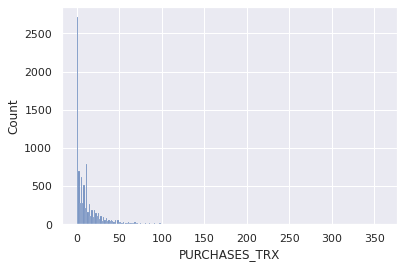

CREDIT_LIMIT


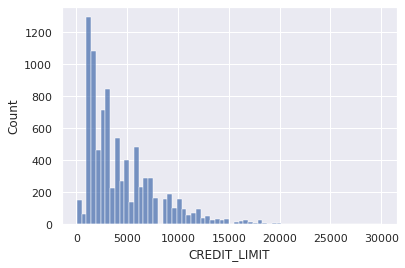

PAYMENTS


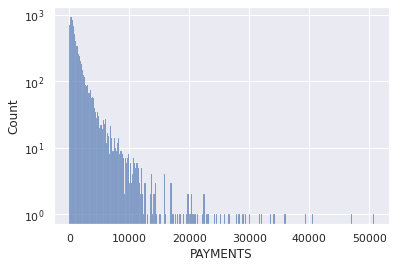

MINIMUM_PAYMENTS


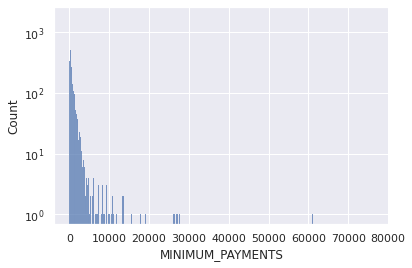

PRC_FULL_PAYMENT


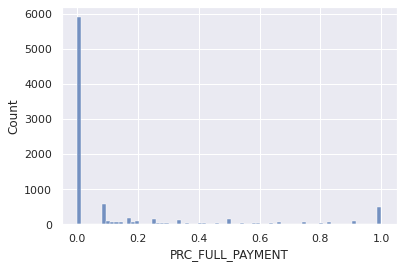

TENURE


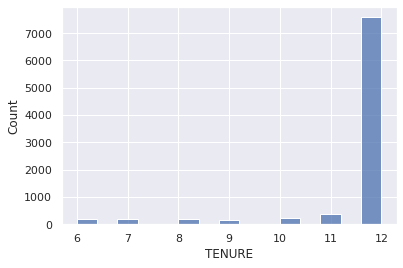

In [ ]:
for feature in credit_cards.columns:
    print(feature)
    if feature in ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS']:
        hist = sns.histplot(data=credit_cards, x=feature)
        hist.set(yscale='log')

    else:
        sns.histplot(data=credit_cards, x=feature)
    plt.show()

#sns.histplot(data=credit_cards, x='BALANCE')

<h3>Correlation</h3>
Here is the correlation matrix containing the most correlated features. These are <strong>PURCHASES</strong> and <strong>ONEOFF_PURCHASES</strong>, <strong>PURCHASES_FREQUENCY</strong> and <strong>PURCHASES_INSTALLMENTS_FREQUENCY</strong>, <strong>CASH_ADVANCE_TRX</strong> and <strong>CASH_ADVANCE_FREQUENCY</strong>.

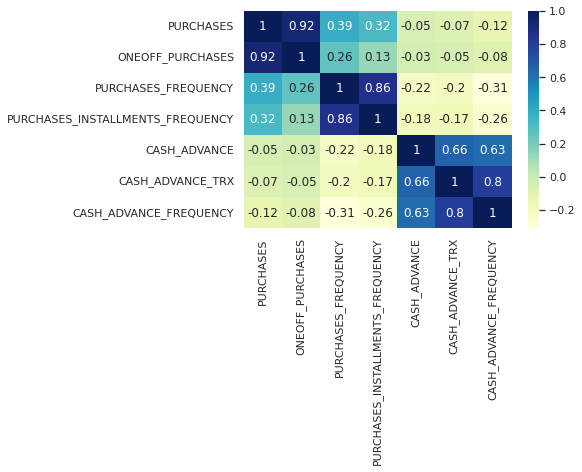

In [ ]:
corr_matrix = credit_cards[["PURCHASES", "ONEOFF_PURCHASES", "PURCHASES_FREQUENCY",
                 "PURCHASES_INSTALLMENTS_FREQUENCY", "CASH_ADVANCE", "CASH_ADVANCE_TRX", 
                 "CASH_ADVANCE_FREQUENCY"]].corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

<h4>Colored pairplot with few selected features</h4>
Here is a pairplot showing correlation between some features

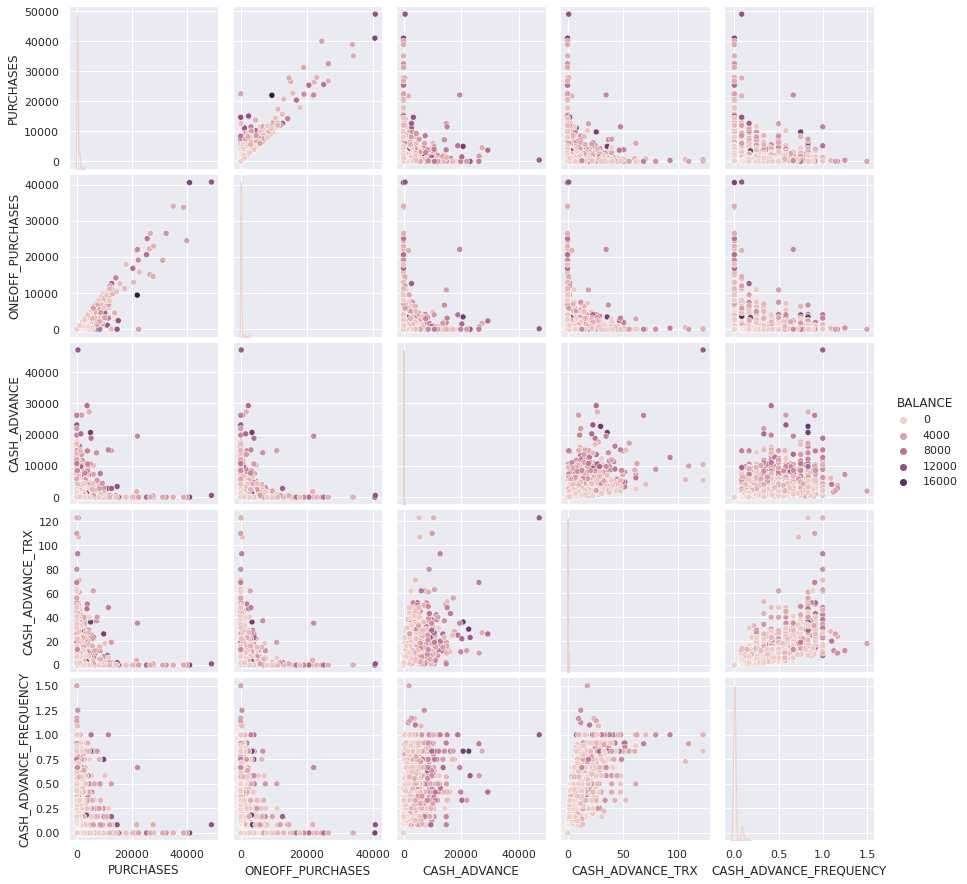

In [ ]:
reduced_df = credit_cards[["BALANCE", "PURCHASES", "ONEOFF_PURCHASES", "CASH_ADVANCE",
                "CASH_ADVANCE_TRX", "CASH_ADVANCE_FREQUENCY"]]
sns.pairplot(data=reduced_df, hue="BALANCE")

## Preprocessing
  
Remove **ID** column from dataset. It is useless for clustering.
Create two similar pipelines to preprocess data. In first one, we only scale values with MinMaxScaler so that all data are in range [0, 1]. 

In the second one, we also perform log transform on features with logarithmic distribution. Applying log transform creates a smoother distribution and **red point** is closer to **blue point** which is a desired effect for clustering.

Log distribution before log transform:
<img src='before_log.png' width="800" height="400">

After log transform:
<img src='after_log.png' width="800" height="400">

We also use **VarianceThreshold** in both pipelines, which is a feature selection method, that throws away features which have low variance.


(images taken from https://developers.google.com/machine-learning/clustering/prepare-data)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing

# preprocessing
credit_cards = credit_cards.dropna()
## chosen features based on experiments from K-means clustering analysis
chosen_features = credit_cards.drop(columns=['TENURE', 'CREDIT_LIMIT', 'BALANCE_FREQUENCY'])
log_features = ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES', 'CASH_ADVANCE', 
                'CASH_ADVANCE_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS']

# basic pipeline
pl = make_pipeline(
    VarianceThreshold(threshold=5),
    MinMaxScaler(),
)

# log pipeline
pl_log_transform = make_pipeline(
    make_column_transformer((FunctionTransformer(np.log1p, validate=True), log_features), remainder="passthrough"),
    VarianceThreshold(threshold=5),
    MinMaxScaler(),
)

# print(credit_cards.shape)
transformed_features_basic = pl.fit_transform(credit_cards)
transformed_features_log = pl_log_transform.fit_transform(credit_cards)

chosen_log_transf = pl_log_transform.fit_transform(chosen_features)
chosen_basic_transf = pl.fit_transform(chosen_features)

# normalized dataset for k-means
normalize_cards = credit_cards.copy()
normalized_chosen_log = pl_log_transform.fit_transform(chosen_features)
normalized_chosen_log = preprocessing.normalize(normalized_chosen_log)

Here are functions for interpreting created clusters. <br>

Function **box_plots_for_clusters()** creates box plots for each feature in all clusters. <br>

Function **PCA_graph()** applies two-component PCA() to our preprocessed dataset and plots found clusters using **labels** obtained by clustering algorithm.

In [ ]:
def box_plots_for_clusters(data, features, cluster_labels):
    data_clusters = data.copy()
    data_clusters['cluster'] = cluster_labels
    for feature in features:
        sns.boxplot(data=data_clusters, x='cluster', y=feature)
        plt.show()


In [ ]:
def PCA_graph(features, labels):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(features)
    principalDf = pd.DataFrame(data = principalComponents
                , columns = ['principal component 1', 'principal component 2'])
    principalDf['cluster'] = labels

    plt.figure(figsize = (10,10))
    plt.title("2 Component PCA")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    sns.scatterplot(x='principal component 1',
                   y='principal component 2',
                   data=principalDf,
                   hue = 'cluster',
                   palette='bright',
                   s = 20,
                   alpha=0.5)

    plt.show()
    plt.close()

## Clustering
Cluster data with different algorithms:
1. K-means
2. DBSCAN
3. Spectral clustering
4. HAC

<h3>K-Means Algorithm</h3>

According to sklearn documentation the KMeans algorithm clusters data by trying to separate samples into n groups of equal <strong>variance</strong>, minimizing a criterion known as the **inertia** or **within-cluster sum-of-squares**. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The K-Means algorithm divides a set of  samples  into  disjoint clusters, each described by the mean 
of the samples in the cluster. The means are commonly called the cluster <strong>centroids</strong>.

In this block, we tried to find the right value for threshold in VarianceThreshold. As our method of comparing we chose the silhouette score.


In [ ]:
!pip install yellowbrick==1.4
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

     |████████████████████████████████| 274 kB 37.2 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


1
threshold: 0.01, n_clusters: 2, silhouette coefficient: 0.33, features count: 16 selected features: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
2
threshold: 0.02, n_clusters: 2, silhouette coefficient: 0.35, features count: 11 selected features: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT', 'TENURE']
3
4
5
threshold: 0.05, n_clusters: 2, silhouette coefficient: 0.39, features count: 8 selected features: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYME

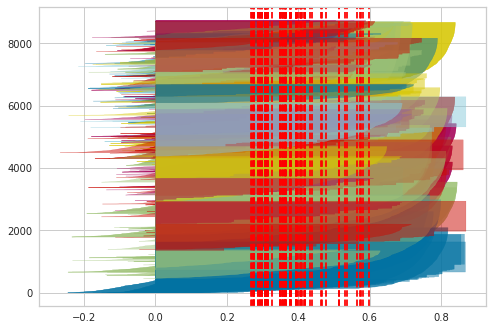

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

ccs = pd.read_csv('CC GENERAL.csv')
ccs = ccs.dropna()
ccs = ccs.drop(columns=['CUST_ID'])

log_features = ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES', 'CASH_ADVANCE',
                 'CASH_ADVANCE_TRX' , 'PAYMENTS', 'MINIMUM_PAYMENTS']

cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',
 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

pl_preprocess_kmeans = make_pipeline(    
    make_column_transformer(
        (FunctionTransformer(np.log1p, validate=True), log_features),
        remainder="passthrough"
        ),
    MinMaxScaler(),
)

best_configuration = (0, 0, 0, [])
best_silhouette = 0.0

for threshold in range(1, 17):
    print(threshold)
    for n_clusters in range(2, 11):
        ccs = pd.read_csv('CC GENERAL.csv')
        ccs = ccs.dropna()
        ccs = ccs.drop(columns=['CUST_ID'])
        cc_preprocessed = pl_preprocess_kmeans.fit_transform(ccs)

        selector = VarianceThreshold(threshold / 100)
        cc_preprocessed = selector.fit_transform(cc_preprocessed)
        
        features_indices = selector.get_support()
        selected_features = []
        for i in range(len(cols)):
            if features_indices[i]:
                selected_features.append(cols[i])

        visualizer = SilhouetteVisualizer(
            KMeans(n_clusters, random_state=42),
            colors="yellowbrick"
            )

        visualizer.fit(cc_preprocessed)
        silh_coeff = round(visualizer.silhouette_score_, 2)

        configuration = (threshold/100, n_clusters, silh_coeff, selected_features)

        if silh_coeff > best_silhouette:
            best_silhouette = silh_coeff
            best_configuration = configuration
            print(f"threshold: {threshold/100}, n_clusters: {n_clusters}, silhouette coefficient: {silh_coeff}, features count: {len(selected_features)} selected features: {selected_features}")


In [ ]:
least_important_features = set(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']) - set(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT', 'TENURE'])
print(least_important_features)

less_important_features = set(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT', 'TENURE']) - set(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT'])
print(less_important_features)

less_important_features2 = set(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT']) - set(['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX'])
print(less_important_features2)

{'MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY'}
{'INSTALLMENTS_PURCHASES', 'TENURE', 'PURCHASES_INSTALLMENTS_FREQUENCY'}
{'PURCHASES', 'PRC_FULL_PAYMENT'}


According to VarianceThreshold(), the least useful features are **MINIMUM_PAYMENTS, CREDIT_LIMIT, ONEOFF_PURCHASES_FREQUENCY, CASH_ADVANCE, PURCHASES_FREQUENCY**. However, after deleting them, we were able to achieve only 0.35 silhouette coefficient. <br>

After removing other less important features - **INSTALLMENTS_PURCHASES, TENURE and PURCHASES_INSTALLMENTS_FREQUENCY** we were able to achieve 0.42 silhouette coefficient.<br>

Furthermore, we deleted **PURCHASES, PRC_FULL_PAYMENT** features and were able to get 0.48 silhouette coefficient. <br>

In the end, only three features were left. Even though silhouette coefficient was 0.6, the best amount of clusters was 10, which is too many clusters for so few features.

In the end, we decided to combine information obtained from VarianceThreshold and our experimental finding. We have tried manually removing attributes <strong>TENURE, BALANCE_FREQUENCY</strong> and <strong>CREDIT_LIMIT</strong>, because as you will see, their values in all clusters are very similar. After manually removing features selected by us and then applying VarianceThreshold, the best silhouette coefficient was <strong>0.61</strong>, amount of clusters for KMeans was 6 and 6 features were kept. <br>
After a lot of experiments, we decided to use this preprocessed dataset for all the clustering algorithms. <br>

According to several sources, Kmeans yields better results when peformed on normalized data. It is because the inertia measure, which is a sum of squares of distances of points from centroids. That is why we also tried KMeans on normalized data. 

<h4> The Best Cluster Amount </h4>
We used silhouette score and <strong>KElbow</strong> method to determine what amount of clusters gives the best results. For both log-transformed data and log-transformed normalized data, the best number is seven.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


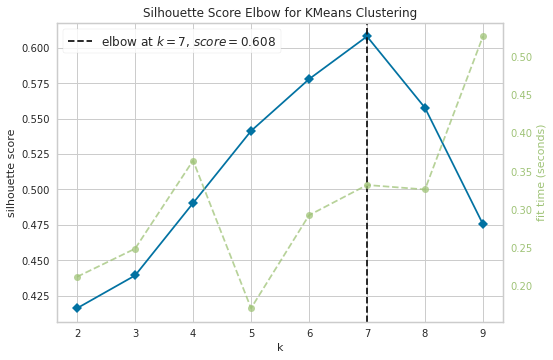

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer = KElbowVisualizer(KMeans(), k=(2,10), metric='silhouette')
visualizer.fit(chosen_log_transf)        
visualizer.show()

Here we finally created clusters using KMeans. <br>
As you can see, if the data is normalized, we get more dense clusters and better results.

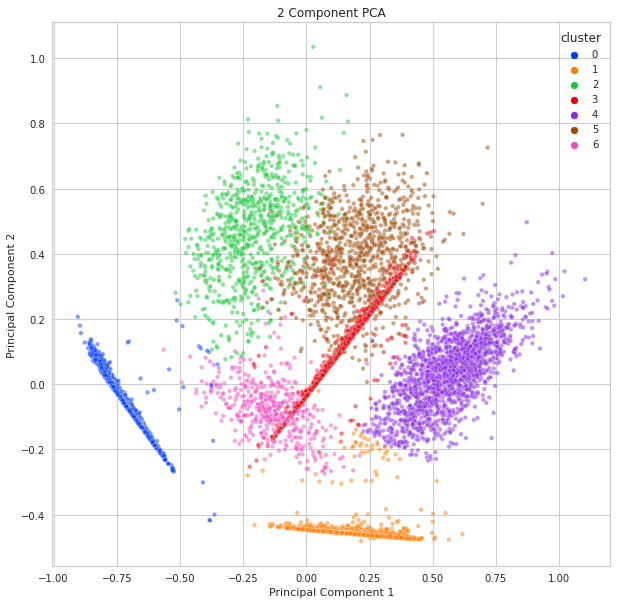

Silhouette coefficient for log transformed data: 0.608


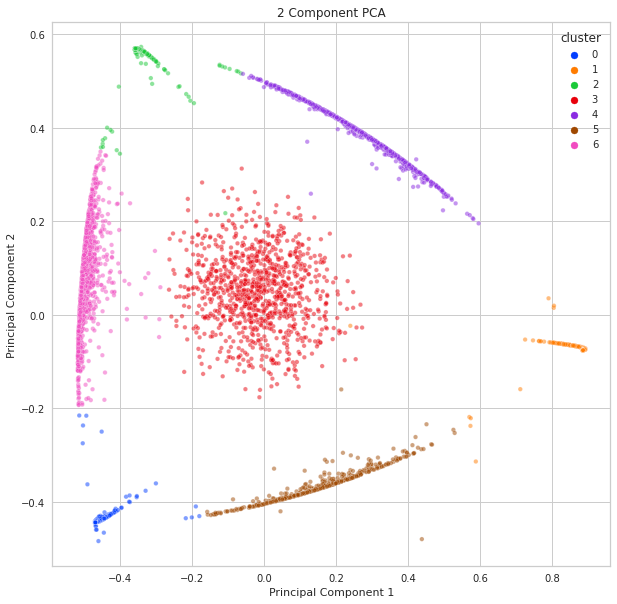

Silhouette coefficient for log transformed and normalized data: 0.739


In [ ]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=7, random_state=42)

# do kmeans on log-transformed data
kmeans_clusters = kmeans.fit_predict(chosen_log_transf)
PCA_graph(chosen_log_transf, kmeans_clusters)
silh_score = silhouette_score(chosen_log_transf, kmeans_clusters)
print("Silhouette coefficient for log transformed data: %0.3f" % silh_score)

# do kmeans on log transformed and normalized data
kmeans_clusters_norm = kmeans.fit_predict(normalized_chosen_log)
PCA_graph(normalized_chosen_log, kmeans_clusters_norm)
silh_score_norm = silhouette_score(normalized_chosen_log, kmeans_clusters_norm)
print("Silhouette coefficient for log transformed and normalized data: %0.3f" % silh_score_norm)

Here is a table that briefly describes 7 clusters that were found by using KMeans. Further analysis can be found at the end of the document.

In [ ]:
cc_with_clusters = credit_cards.copy()
cc_with_clusters["CLUSTERS"] = kmeans_clusters_norm
cc_with_clusters = cc_with_clusters.groupby("CLUSTERS").mean()
cc_with_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTERS,,,,,,,,,,,,,,,,,
0,426.577434,0.824517,556.821982,0.025730,557.861396,0.044134,0.715700,0.001173,0.681003,0.000196,0.002346,12.104985,3122.823099,789.252037,717.745934,0.324403,11.509091
1,2216.760710,0.903769,0.023664,0.002060,0.055486,2029.082961,0.000889,0.000257,0.000633,0.276649,6.409919,0.009615,4069.188596,1738.607479,1006.540555,0.046093,11.358806
2,801.469310,0.794073,913.651826,913.605479,0.138076,0.206401,0.366888,0.366481,0.000895,0.000717,0.007812,8.161133,4431.065045,1220.591180,497.643929,0.146504,11.610352
3,2824.229533,0.969822,1937.673203,1166.864197,771.117410,2103.718707,0.779166,0.396634,0.628596,0.293071,7.808233,30.313253,5828.826417,3051.000595,1247.903261,0.069815,11.623494
4,2387.297018,0.934392,662.760105,662.792919,0.012631,2062.096522,0.278272,0.277672,0.000654,0.299728,6.989529,6.387435,4647.152546,1987.173610,1036.308867,0.057429,11.339005
5,2579.958038,0.957260,541.823451,0.024181,542.504558,2002.358331,0.655822,0.001106,0.608449,0.263794,6.234513,12.462389,4327.212389,1871.323018,1445.340732,0.047253,11.327434
6,1219.820443,0.937897,2495.325073,1524.006638,971.346940,0.077802,0.814809,0.461172,0.651690,0.000291,0.003490,34.966259,5723.328574,2313.478278,613.102685,0.259900,11.805701


### DBSCAN algorithm
DBSCAN algorithm (Density-Based Spatial Clustering of Applications with Noise)

Finds core samples of high density and expands clusters from them. Density of object is measured as number of other objects close to it. Clusters are considered as objects with high density. 

DBSCAN has two main parameters:
1. eps - The distance that specifies the neighborhoods. Two points are considered to be neighbors if the distance between them are less than or equal to eps.
2. Minimum number of data points for a point to have dense neighbourhood and be considered as part of some cluster.

Good for data which contains clusters of similar density. Can find clusters of arbitrary shape.

Parameter **MinPts** is chosen as 20. It should be >= Number dimensions (featues) + 1.

To find the optimal value of **eps** for DBSCAN we use **K-distance graph**. This technique calculates the average distance between each point and its k nearest neighbors, where k = the MinPts value we selected. The average k-distances are plotted in ascending order on a k-distance graph. The point where the curvature is the steepest should be selected as the optimal epsilon input.

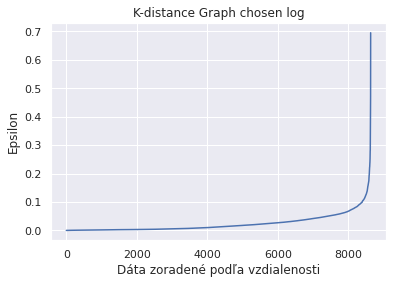

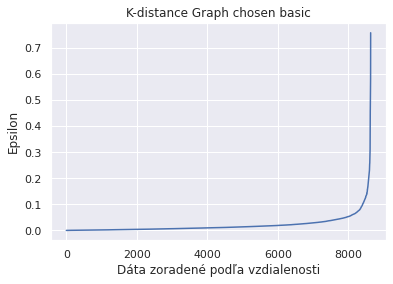

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def k_distane_method(data: pd.DataFrame, title):
    neigh = NearestNeighbors(n_neighbors=20)
    nbrs = neigh.fit(data)
    distances, _ = nbrs.kneighbors(data)

    # Plotting K-distance Graph
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    #plt.figure(figsize=(20,10))
    plt.plot(distances)
    plt.title('K-distance Graph ' + title)
    plt.xlabel('Dáta zoradené podľa vzdialenosti')
    plt.ylabel('Epsilon')
    plt.show()

k_distane_method(chosen_log_transf, 'chosen log')
k_distane_method(chosen_basic_transf, 'chosen basic')


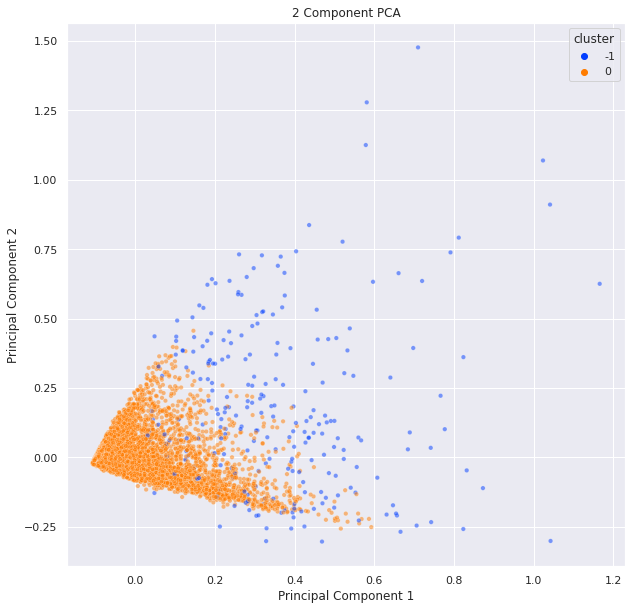

Silhouette score: 0.719


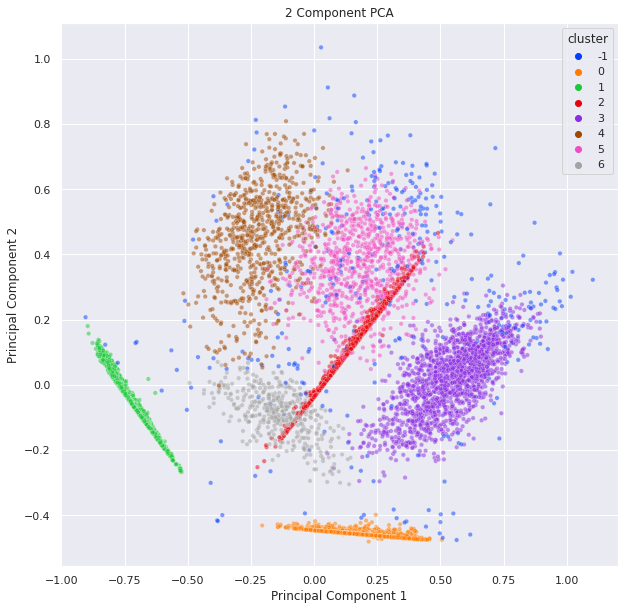

Silhouette score: 0.588


In [ ]:
def parametrized_pl_dbscan(eps=0.2):
    return make_pipeline(DBSCAN(eps=eps, min_samples=20))

cluster_chosen_basic = parametrized_pl_dbscan(0.13).fit_predict(chosen_basic_transf)
PCA_graph(chosen_basic_transf, cluster_chosen_basic)
print('Silhouette score: %0.3f' % silhouette_score(chosen_basic_transf, cluster_chosen_basic))

cluster_chosen_log = parametrized_pl_dbscan(0.13).fit_predict(chosen_log_transf)
PCA_graph(chosen_log_transf, cluster_chosen_log)
print('Silhouette score: %0.3f' % silhouette_score(chosen_log_transf, cluster_chosen_log))


In the first graph there are 7 clusters distinct clusters and silhouette score was 0.588.

Even though the Silhouette score is better 0.719 for data that wasn't log transformed we can see that there is only 1 final cluster and points classified as outliers. High silhouette score doesn't always guarantee the most meaningful/helpful clustering. Knowledge from data domain is more important for choosing the better clustering.


In [ ]:
chosen_clusters = chosen_features.copy()
chosen_clusters['dbscan_labels'] = cluster_chosen_log
chosen_clusters.groupby('dbscan_labels').mean()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
dbscan_labels,,,,,,,,,,,,,,
-1,6144.515499,5422.227439,3463.583908,1961.263208,2539.385996,0.785904,0.456796,0.637965,0.213676,6.433962,67.568733,6612.991163,3321.747863,0.101606
0,362.553254,511.251875,0.000857,511.974869,0.000000,0.714396,0.000248,0.679480,0.000000,0.000000,11.644643,745.151916,613.716010,0.327164
1,2189.363797,0.001053,0.001053,0.000000,1999.279181,0.000216,0.000216,0.000000,0.276318,6.398271,0.004069,1702.291201,999.912059,0.046146
2,722.918822,840.999039,841.092042,0.001972,0.000000,0.359821,0.359484,0.000084,0.000000,0.000000,7.177958,1166.144136,441.099445,0.146962
3,961.444138,2029.079028,1204.557774,824.551223,0.000000,0.807394,0.449060,0.640345,0.000000,0.000000,29.920489,1931.249007,466.951006,0.262115
4,2211.972457,533.905377,533.952170,0.000000,1977.185351,0.271993,0.271881,0.000000,0.296959,6.884097,5.557951,1847.204509,963.244971,0.058153
5,2196.529748,1486.064946,887.963078,598.128479,1780.587213,0.766921,0.378668,0.607844,0.284872,7.207186,24.498204,2383.960913,938.476894,0.072020
6,2088.206812,475.552775,0.004809,476.262775,1816.131314,0.653411,0.000598,0.603647,0.257473,6.045455,10.978469,1642.659426,1284.284219,0.049048


<h3> Spectral clustering </h3>
Spectral clustering uses connectivity approach, where the points in a cluster are either immediately next to each other or connected, compared to K-means which uses the compactness approach (distance). Spectral Clustering treats each data point as a graph-node and thus transforms the clustering problem into a graph-partitioning problem

The three major steps involved in spectral clustering are:

1. <b>Constructing a Similarity Graph</b>: This step builds the Similarity Graph in the form of an adjacency matrix that can be built in one of the following manners: Epsilon-neighbourhood Graph, K-Nearest Neighbours or Fully-Connected Graph

2. <b>Projecting the data onto a lower Dimensional Space</b>: It is done by computing the Graph Laplacian Matrix

3. <b>Clustering the Data</b>: This process mainly involves clustering the reduced data by using K-Means Clustering. First, each node is assigned a row of the normalized of the Graph Laplacian Matrix. Then this data is clustered using any traditional technique.

The present version of SpectralClustering requires the number of clusters to be specified in advance. It works well for a small number of clusters, but is not advised for many clusters. 
Properties:
- Assumption-Less: This clustering technique, unlike other traditional techniques do not assume the data to follow some property. Thus this makes this technique to answer a more-generic class of clustering problems.
- Ease of implementation and Speed: This algorithm is easier to implement than other clustering algorithms and is also very fast as it mainly consists of mathematical computations.
- Not-Scalable: Since it involves the building of matrices and computation of eigenvalues and eigenvectors it is time-consuming for dense datasets.

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

Silhouette coefficient for default configuration of the algorithm.

In [ ]:
clustering = SpectralClustering().fit(chosen_log_transf)
labels = clustering.labels_
score = silhouette_score(chosen_log_transf, labels)
print("Silhouette coefficient: %0.3f" % score)

Silhouette coefficient: 0.596


It is especially computationally efficient if the amg solver is used for the eigenvalue problem. That's why we will use it in every clustering.

<h5>Hyperparameters</h5>
Some of the parameters of SpectralClustering algorithm from Scikitlearn:

- n_clusters: number of clusters
- eigen_solver: the eigenvalue decomposition strategy to use; we used 'amg' for faster computation
- n_components: number of eigenvectors to use for the spectral embedding
- random_state: a pseudo random number generator used for the initialization of the lobpcg eigenvectors decomposition when eigen_solver == 'amg', and for the K-Means initialization. We used an int(42) to make the results deterministic across calls
- n_init: number of times the k-means algorithm will be run with different centroid seeds
- gamma: kernel coefficient for rbf
- affinity: how to construct the affinity matrix; we used the default one, rbf=radial basis function kernel

We tweaked the hyperparameters using the silhouette coefficient as a metric. Best values of hyperparameters are:
(n_clusters=7, n_components=9, n_init=12, gamma=1.0). 
Some of the hyperparameters have the highest silhouette coefficient for the default value, for example affinity='rbf'.




In [ ]:
# n_clusters: algorithm is not suitable for large amount of clusters
n_clusters, best_clusters_coeff = 0, 0
for n in range(2, 10):
    clustering = SpectralClustering(n_clusters=n).fit(chosen_log_transf)
    labels = clustering.labels_
    score = silhouette_score(chosen_log_transf, labels)
    if score > best_clusters_coeff:
        n_clusters = n
        best_clusters_coeff = score
print("Ideal n_clusters: %0.0f With silhouette coefficient: %0.3f" % (n_clusters, best_clusters_coeff))

# n_components
n_components, best_components_coeff = 0, 0
for n in range(2, 12):
    clustering = SpectralClustering(n_clusters=n_clusters, n_components=n).fit(chosen_log_transf)
    labels = clustering.labels_
    score = silhouette_score(chosen_log_transf, labels)
    if score > best_components_coeff:
        n_components = n
        best_components_coeff = score
print("Ideal n_components: %0.0f With silhouette coefficient: %0.3f" % (n_components, best_components_coeff))

#n_init
n_init, best_init_coeff = 0, 0
for n in range(1, 20):
    clustering = SpectralClustering(n_clusters=n_clusters, n_components=n_components, n_init=n).fit(chosen_log_transf)
    labels = clustering.labels_
    score = silhouette_score(chosen_log_transf, labels)
    if score > best_init_coeff:
        n_init = n
        best_init_coeff = score
print("Ideal n_init: %0.0f With silhouette coefficient: %0.3f" % (n_init, best_init_coeff))

# gamma
gamma, best_gamma_coeff = 0, 0
for n in [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.2, 1.5, 1.8, 2.0]:
    clustering = SpectralClustering(n_clusters=n_clusters, n_components=n_components, n_init=n_init, gamma=n).fit(chosen_log_transf)
    labels = clustering.labels_
    score = silhouette_score(chosen_log_transf, labels)
    if score > best_gamma_coeff:
        gamma = n
        best_gamma_coeff = score
print("Ideal gamma: %0.1f With silhouette coefficient: %0.3f" % (gamma, best_gamma_coeff))

Ideal n_clusters: 7 With silhouette coefficient: 0.603
Ideal n_components: 9 With silhouette coefficient: 0.606
Ideal n_init: 12 With silhouette coefficient: 0.606
Ideal gamma: 1.0 With silhouette coefficient: 0.606


In [ ]:
# tweaked hyperparameters
n_clusters = 7
n_components = 9
n_init = 12
gamma = 1.0

Comparison of graphs and silhouette coefficients before and after tweaking of the hyperparameters.

Silhouette coefficient with default values: 0.597
Silhouette coefficient after tweaking hyperparameters: 0.606


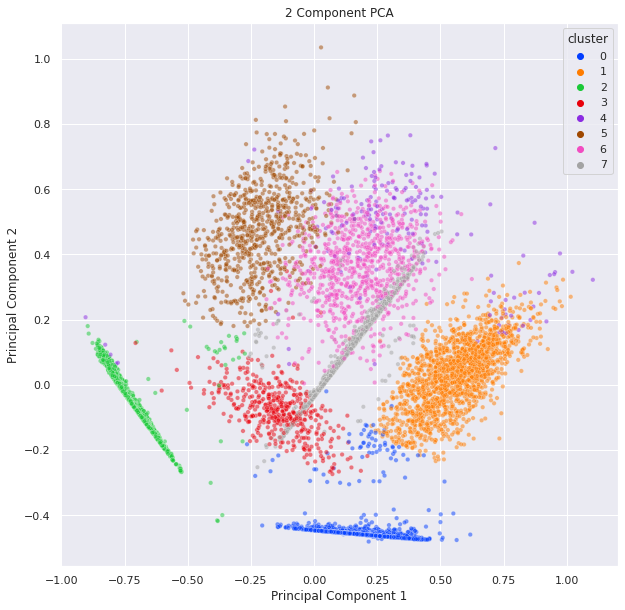

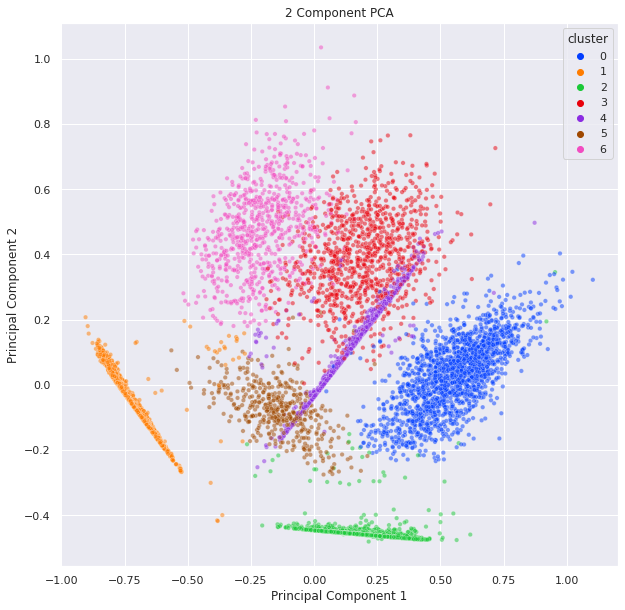

In [ ]:
# spectral clustering with default values
sc_0 = SpectralClustering().fit(chosen_log_transf)
score_0 = silhouette_score(chosen_log_transf, sc_0.labels_)

# spectral clustering with tweaked hyperparameters
sc = SpectralClustering(n_clusters=n_clusters, n_components=n_components, n_init=n_init, gamma=gamma, eigen_solver='amg', random_state=42).fit(chosen_log_transf)
score = silhouette_score(chosen_log_transf, sc.labels_)

# print the corresponding silhouette coefficients
print("Silhouette coefficient with default values: %0.3f" % score_0)
print("Silhouette coefficient after tweaking hyperparameters: %0.3f" % score)

# show the corresponding PCA graphs
PCA_graph(chosen_log_transf, sc_0.labels_)
PCA_graph(chosen_log_transf, sc.labels_)

To further ameliorate the score of the spectral clustering we used Cosine distance instead of Euclidean distance, since it works better for high dimensional data. Cosine distance and Euclidean distance are connected linearly for normalized vectors so we can simply normalize the data.

Silhouette coefficient with euclidean distance: 0.606
Silhouette coefficient with cosine distance: 0.665


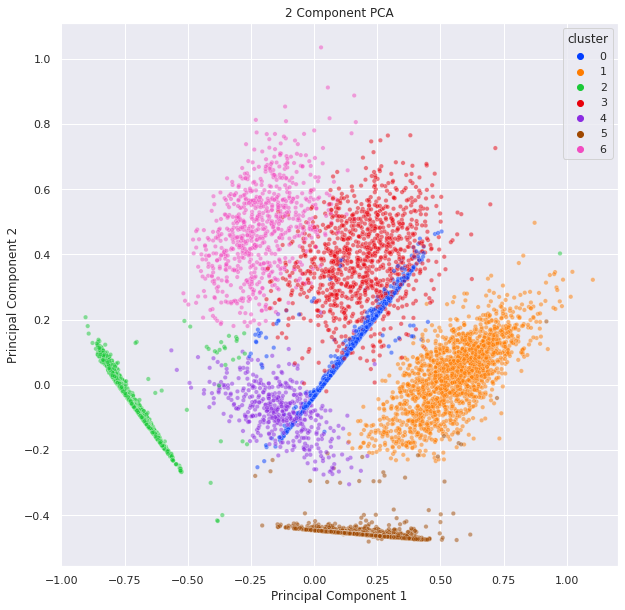

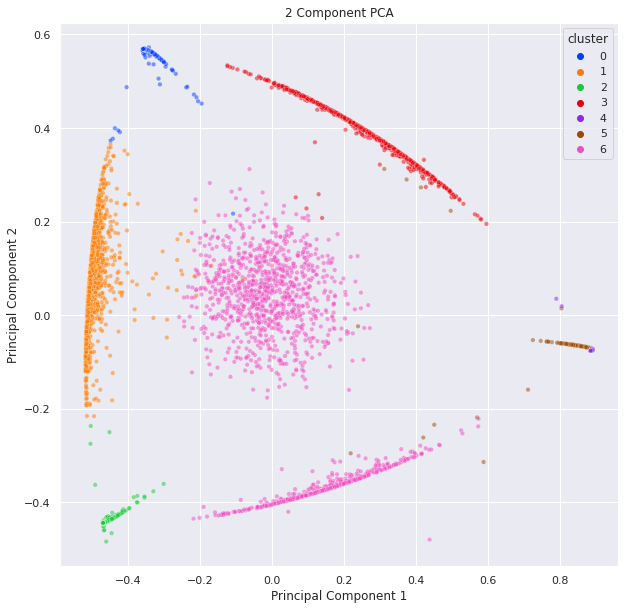

In [ ]:
from sklearn import preprocessing

# default euclidean distance
sc = SpectralClustering(n_clusters=n_clusters, n_components=n_components, n_init=n_init, gamma=gamma, eigen_solver='amg', random_state=42)
clusters = sc.fit(chosen_log_transf.copy())
score = silhouette_score(chosen_log_transf, clusters.labels_)

# cosine distance instead of euclidean
normalized_vectors = preprocessing.normalize(chosen_log_transf)
normalized_sc = SpectralClustering(n_clusters=7, n_components=9, n_init=4, gamma=0.1, eigen_solver='amg', random_state=42)
normalized_clusters = normalized_sc.fit(normalized_vectors)
normalized_score = silhouette_score(normalized_vectors, normalized_clusters.labels_)

# print the corresponding silhouette coefficients
print("Silhouette coefficient with euclidean distance: %0.3f" % score)
print("Silhouette coefficient with cosine distance: %0.3f" % normalized_score)

# show the corresponding PCA graphs
PCA_graph(chosen_log_transf, clusters.labels_)
PCA_graph(normalized_vectors, normalized_clusters.labels_)

Here are the resulting clusters with mean values:

In [ ]:
normalized_vectors = preprocessing.normalize(chosen_log_transf)
normalized_sc = SpectralClustering(n_clusters=7, n_components=9, n_init=4, gamma=0.1, eigen_solver='amg', random_state=42)
clusters = normalized_sc.fit_predict(normalized_vectors)

cc_with_clusters = credit_cards.copy()
cc_with_clusters["CLUSTERS"] = clusters
cc_with_clusters = cc_with_clusters.groupby("CLUSTERS").mean()
cc_with_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTERS,,,,,,,,,,,,,,,,,
0,792.276758,0.792504,905.215628,905.257003,0.051533,0.000000,0.365052,0.364722,0.000495,0.000000,0.000000,8.070227,4419.743428,1217.863360,497.611630,0.145083,11.611276
1,1244.847613,0.938314,2526.919039,1553.620334,973.326899,0.910351,0.815565,0.463920,0.651959,0.000915,0.011507,35.136364,5735.242703,2345.317180,618.397384,0.258709,11.807250
2,420.707739,0.823897,556.718699,0.015562,557.772042,0.000000,0.715334,0.000540,0.680612,0.000000,0.000000,12.102413,3120.961380,788.155821,714.640521,0.325058,11.507357
3,2315.704194,0.933809,672.899364,672.859780,0.084617,2027.358675,0.280340,0.279638,0.000973,0.295796,6.875486,6.457847,4596.400189,1974.384127,1011.566292,0.060160,11.342412
4,1202.347448,0.872736,0.002115,0.002115,0.000000,1607.142296,0.000236,0.000236,0.000000,0.247333,5.442294,0.004838,2925.858097,1489.515847,540.010926,0.060100,11.259848
5,5087.494099,0.989071,2.052378,1.602603,0.575150,3171.935111,0.005306,0.002497,0.002809,0.359427,9.123596,0.063670,7278.089888,2389.885208,2304.252764,0.007536,11.636704
6,2720.704896,0.965690,1450.500794,758.260216,692.676483,2090.303507,0.739741,0.268112,0.621810,0.284732,7.347493,24.386490,5327.305788,2653.535316,1309.414230,0.062524,11.523677


### HAC algorithm
Agglomerative clustering works from bottom up. It merges two closest clusters into one bigger. This creates a hierarchy which can be visualized as a tree. This algorithm has cubic time complexity, making it generally too slow for bigger datasets.

The linkage criteria changes how exactly the cluster are formed. The **ward** metric minimizes variance, making the approach similiar to K-means clustering.

The nubmer of clusters was chosen using sillhouette score.

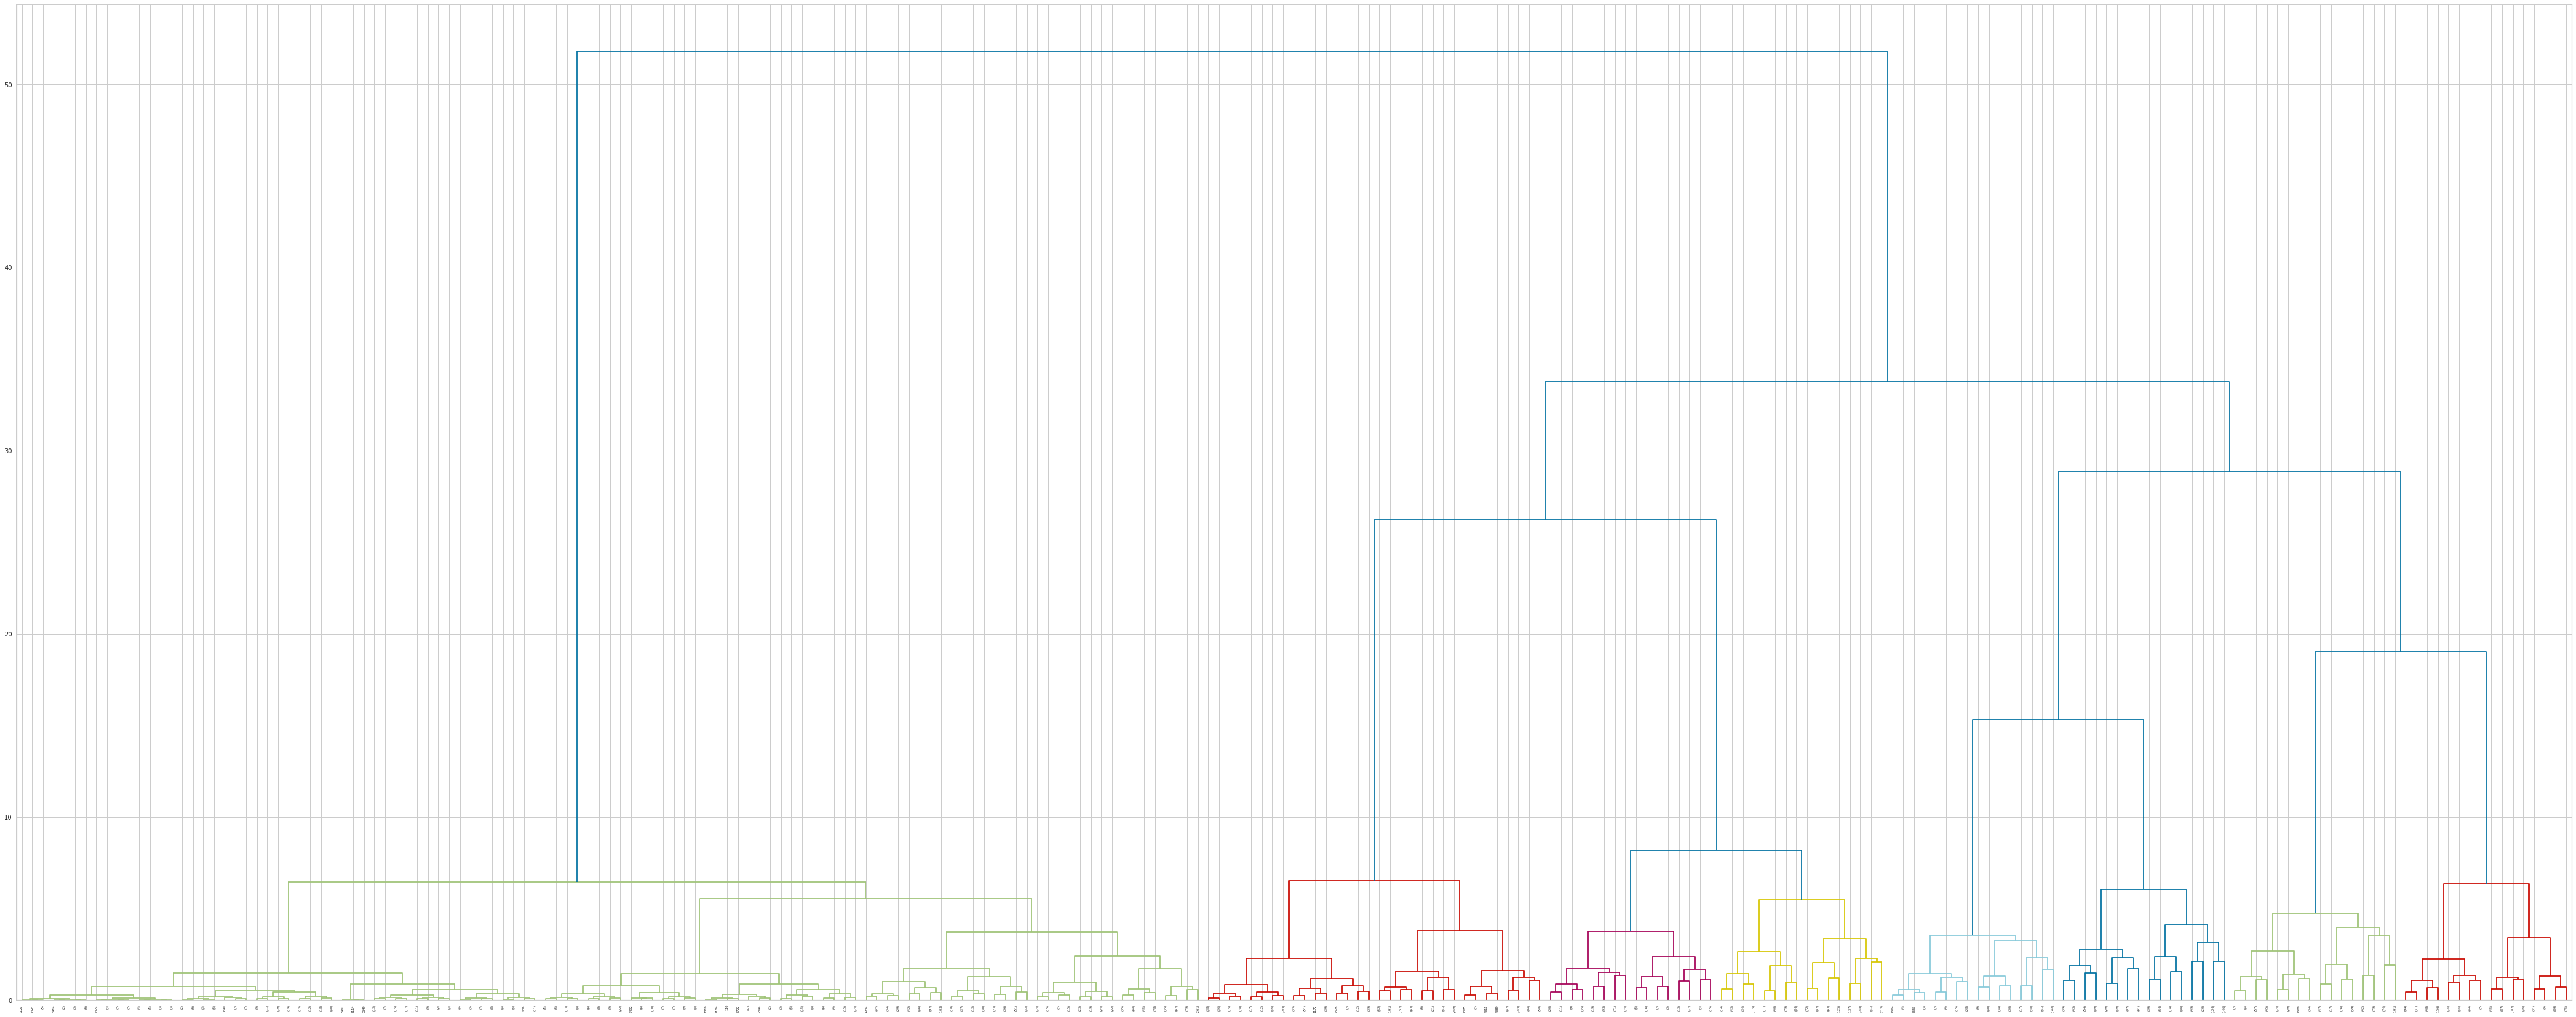

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(chosen_log_transf, "ward")
fig = plt.figure(figsize=(75, 30))
dn = dendrogram(Z, p=7, truncate_mode = 'level', color_threshold=7)

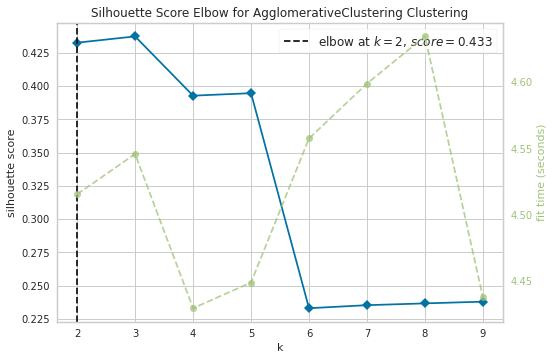

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import AgglomerativeClustering

visualizer = KElbowVisualizer(AgglomerativeClustering(), k=(2,10), metric='silhouette')
visualizer.fit(chosen_basic_transf)        
visualizer.show()

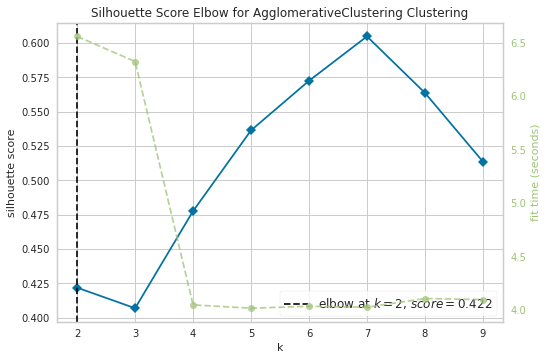

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer2 = KElbowVisualizer(AgglomerativeClustering(), k=(2,10), metric='silhouette')
visualizer2.fit(chosen_log_transf)        
visualizer2.show()

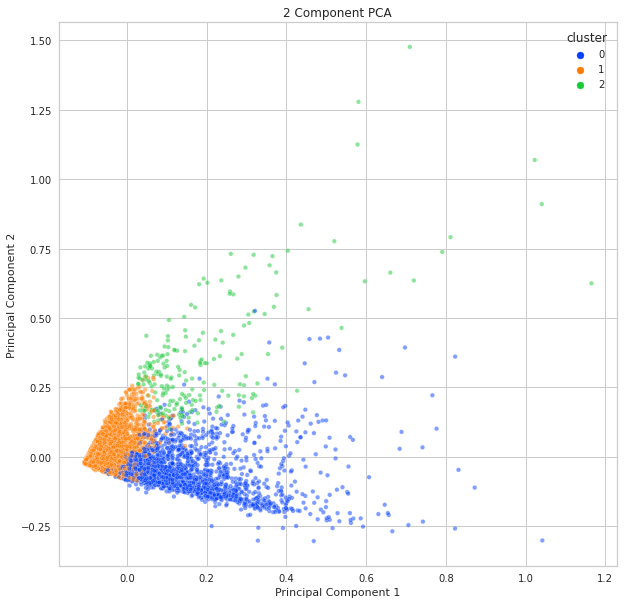

Silhouette score:  0.43731246009293595


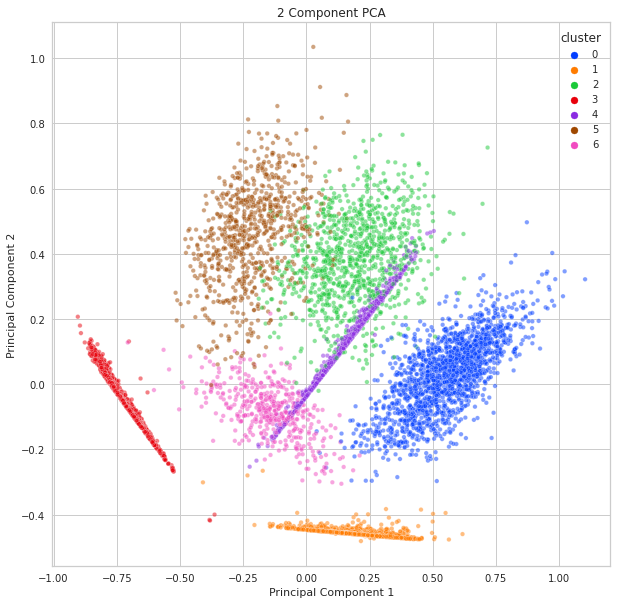

Silhouette score:  0.6046938290880052


In [ ]:
ac = AgglomerativeClustering(n_clusters=3)
ac_log = AgglomerativeClustering(n_clusters=7)

hac_clusters = ac.fit_predict(chosen_basic_transf)
hac_log_clusters = ac_log.fit_predict(chosen_log_transf)

PCA_graph(chosen_basic_transf, hac_clusters)
print('Silhouette score: ',silhouette_score(chosen_basic_transf, hac_clusters))


PCA_graph(chosen_log_transf, hac_log_clusters)
print('Silhouette score: ',silhouette_score(chosen_log_transf, hac_log_clusters))


## Cluster interpretation

<h3>Cluster description</h3>

In [ ]:
from sklearn.cluster import KMeans
kmeans_clusters_norm = KMeans(n_clusters=7, random_state=42).fit_predict(normalized_chosen_log)
cc_with_clusters = credit_cards.copy()
cc_with_clusters["CLUSTERS"] = kmeans_clusters_norm
cc_with_clusters = cc_with_clusters.groupby("CLUSTERS").mean()
cc_with_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTERS,,,,,,,,,,,,,,,,,
0,426.577434,0.824517,556.821982,0.025730,557.861396,0.044134,0.715700,0.001173,0.681003,0.000196,0.002346,12.104985,3122.823099,789.252037,717.745934,0.324403,11.509091
1,2216.760710,0.903769,0.023664,0.002060,0.055486,2029.082961,0.000889,0.000257,0.000633,0.276649,6.409919,0.009615,4069.188596,1738.607479,1006.540555,0.046093,11.358806
2,801.469310,0.794073,913.651826,913.605479,0.138076,0.206401,0.366888,0.366481,0.000895,0.000717,0.007812,8.161133,4431.065045,1220.591180,497.643929,0.146504,11.610352
3,2824.229533,0.969822,1937.673203,1166.864197,771.117410,2103.718707,0.779166,0.396634,0.628596,0.293071,7.808233,30.313253,5828.826417,3051.000595,1247.903261,0.069815,11.623494
4,2387.297018,0.934392,662.760105,662.792919,0.012631,2062.096522,0.278272,0.277672,0.000654,0.299728,6.989529,6.387435,4647.152546,1987.173610,1036.308867,0.057429,11.339005
5,2579.958038,0.957260,541.823451,0.024181,542.504558,2002.358331,0.655822,0.001106,0.608449,0.263794,6.234513,12.462389,4327.212389,1871.323018,1445.340732,0.047253,11.327434
6,1219.820443,0.937897,2495.325073,1524.006638,971.346940,0.077802,0.814809,0.461172,0.651690,0.000291,0.003490,34.966259,5723.328574,2313.478278,613.102685,0.259900,11.805701


For the log transformed data and the best combination of features all algorithms resulted in similar clusters 7-8(mostly 7 clusters). To describe the clusters we used the result of KMeans, but other algorithms yielded similar results. 

The 7 resulting clusters describe different types of customers:

- <b>Cluster 0</b>: High balance, low amount and frequency of purchases, high cash advance, low installments.
Customer that uses cash advance but doesn't make purchases, so doesn't need to make installments.
- <b>Cluster 1</b>: Lowest balance, average amount of purchases, low amount of one-off purchases, no cash advance, high purchase frequency, purchase installements frequency similar to purchase frequency.
Customer that makes a lot of smaller purchases and pays everything back.
- <b>Cluster 2</b>: Higher balance, average amount of purchases, high cash advance, high oneoff purchases, low amount and frequency of installments, purchase frequency similar to oneoff purchase frequency.
Customer that made one bigger and few smaller purchases and also uses cash advance, but doesn't make installment.
- <b>Cluster 3</b>: Lower balance, low amount of purchases, purchase frequency similar to oneoff purchase frequency, low cash advance.
Customer that makes bigger purchases, but less frequently, doesn't use cash advance and makes small installments.
- <b>Cluster 4</b>: Average balance, highest purchase amount, highest amount of transactions, highest purchase frequency, highest oneoff purchase, highest installments, low cash advance.
Customer that makes lot of bigger purchases, doesn't use cash advance and pays back everything he borrowed.
- <b>Cluster 5</b>: Highest balance, high purchase amount and frequency, high cash advance, highest credit limit
Customer that spends a lot, but pays back as often as he makes purcahses.
- <b>Cluster 6</b>: High balance, average amount of purchases, low oneoff purchases, average cash advance, average installments.
Customer that makes a lot of smaller purchases and pays them back.



Box plots for certain attributer for KMeans algorithm, that we used to describe the clusters.

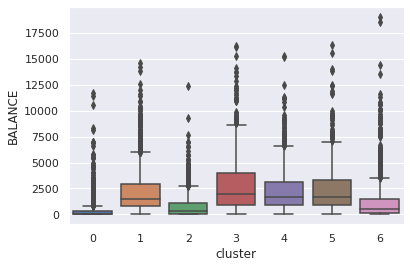

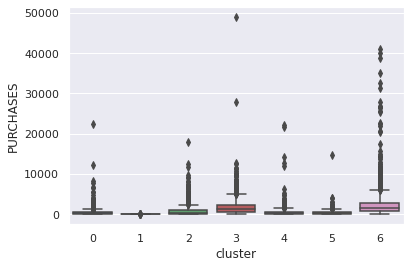

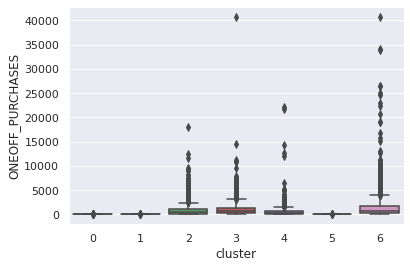

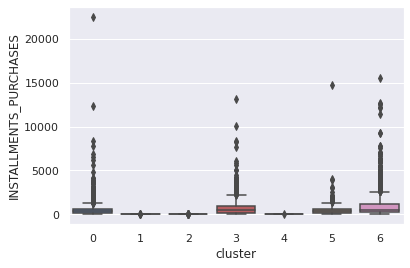

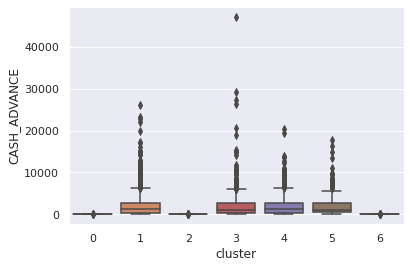

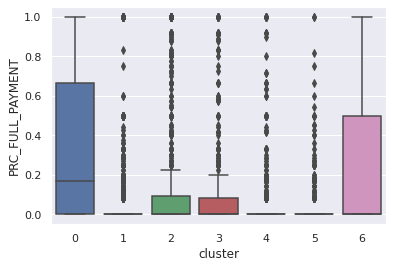

In [ ]:
box_plots_for_clusters(chosen_features, ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'PRC_FULL_PAYMENT'], kmeans_clusters_norm)


<h3>Comparison of models</h3>
Finally we can compare all 4 algorithms with each other and with a "naive" model, we chose K-means with default hyperparameter values. The best silhouette score was achieved with KMeans for normalized data(0.739).

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing


# naive algorithm KMeans
naive_cc = pl_log_transform.fit_transform(chosen_features)
naive_clusters = KMeans().fit(naive_cc)
naive_score = silhouette_score(naive_cc, naive_clusters.labels_)
print("Silhouette coefficient for naive model: %0.3f" % naive_score)

# K-means with the best silhouette coefficient
kmeans_cc = preprocessing.normalize(pl_log_transform.fit_transform(chosen_features.copy()))
kmeans_clusters = KMeans(n_clusters=7, random_state=42).fit_predict(kmeans_cc)
kmeans_score = silhouette_score(kmeans_cc, kmeans_clusters)
print("Silhouette coefficient for KMeans model: %0.3f" % kmeans_score)

# DBSCAN
dbscan_cc = pl_log_transform.fit_transform(chosen_features)
def parametrized_pl_dbscan(eps=0.2):
    return make_pipeline(DBSCAN(eps=eps, min_samples=20))
dbscan_clusters = parametrized_pl_dbscan(0.13).fit_predict(dbscan_cc)
dbscan_score = silhouette_score(dbscan_cc, dbscan_clusters)
print('Silhouette coefficient for DBSCAN: %0.3f' % dbscan_score)

# Spectral clustering
spectral_cc = preprocessing.normalize(pl_log_transform.fit_transform(chosen_features))
sc = SpectralClustering(n_clusters=7, n_components=9, n_init=4, gamma=0.1, eigen_solver='amg', random_state=42)
spectral_clusters = sc.fit_predict(spectral_cc)
spectral_score = silhouette_score(spectral_cc, spectral_clusters)
print('Silhouette coefficient for Spectral clustering: %0.3f' % spectral_score)

# HAC model
hac_cc = pl_log_transform.fit_transform(chosen_features)
hac = AgglomerativeClustering(n_clusters=7)
hac_clusters = hac.fit_predict(hac_cc)
hac_score = silhouette_score(hac_cc, hac_clusters)
print('Silhouette coefficient for Agglomerative clustering: %0.3f' % hac_score)


Silhouette coefficient for naive model: 0.558
Silhouette coefficient for KMeans model: 0.739
Silhouette coefficient for DBSCAN: 0.719
Silhouette coefficient for Spectral clustering: 0.665
Silhouette coefficient for Agglomerative clustering: 0.605


<h3>Conclusion</h3>
In this project built 4 clustering models that were able to divide our credit card users into 7 distinctive groups based on their behavior. Every cluster has its own characteristics in terms of using a credit card.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fbad7045-3358-496f-8ad7-cf48fd0253a8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>